# brain_feature_selection_by_XGB_importance_scores

#### This notebook:
* Load the EWAS aging data selecting for whole blood data
* Split data train/test 75/25
* Impute with mean of each train column
* Run XGboost 50 time on working data (took 4hrs)
* Rank cpgs by frequency in top 100 importance scores
* Save rankings as pickled 'cpgs_XGboost_brain_ranked'

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
import os

#### Import our modules
* age_predict is a python package we created for this project.
* to install it, in a terminal go to the age_predict folder and type: pip install .

In [2]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [3]:
import os
# Get
os.getcwd()
#os.chdir('/Users/dcox/Dropbox')

'/Users/dcox/Desktop/EWAS-organized/brain/feature_selection'

In [4]:
# Paths
path_to_data = '../../data/age_methylation_v1/'
path_to_save_cpgs = '../saved_features/'

#### set tissue of interest

In [5]:
tissue_of_interest = 'brain'

#### Load data

In [6]:
%%time
file_in = path_to_data + 'age_methylation_v1.txt'
file_out = path_to_data + tissue_of_interest + '_age_methylation_v1.txt'

df_t = le.load_EWAS_aging_by_tissue(file_in, file_out, search_term=tissue_of_interest,
                          num_rows='all', verbose=True)

finished line 10000
finished line 20000
finished line 30000
finished line 40000
finished line 50000
finished line 60000
finished line 70000
finished line 80000
finished line 90000
finished line 100000
finished line 110000
finished line 120000
finished line 130000
finished line 140000
finished line 150000
finished line 160000
finished line 170000
finished line 180000
finished line 190000
finished line 200000
finished line 210000
finished line 220000
finished line 230000
finished line 240000
finished line 250000
finished line 260000
finished line 270000
finished line 280000
finished line 290000
finished line 300000
finished line 310000
finished line 320000
finished line 330000
finished line 340000
finished line 350000
finished line 360000
finished line 370000
finished line 380000
finished line 390000
finished line 400000
finished line 410000
finished line 420000
finished line 430000
finished line 440000
finished line 450000
finished line 460000
finished line 470000
finished line 480000



#### Select age 20 and older

In [7]:
df_t_over20 = df_t[df_t.age >=20]

#### Split and impute data
* Drop row with more than 10% NaN
* Impute with means of train col
* Split 75/25

In [8]:
%%time
df_p_working, df_p_saved = le.splitting_and_imputing(df_t_over20, input_percent=10, 
                                           fraction_test=0.25, seed=2021)

CPU times: user 3min 51s, sys: 1min 14s, total: 5min 5s
Wall time: 6min 43s


In [9]:
df_p_working

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,cg00011200,cg00011891,cg00016522,cg00018261,cg00021786,cg00026186,cg00072288,cg00072839,cg00074638,cg00112256,cg00114625,cg00114913,cg00116709,cg00139317,cg00140085,cg00142683,cg00192980,cg00200463,cg00206414,cg00240113,cg00241296,cg00241907,cg00243584,cg00264378,cg00265812,cg00266918,cg00360365,cg00373606,cg00374088,cg00378717,cg00378950,cg00380985,cg00381376,cg00391044,cg00399450,cg00408231,cg00412010,cg00412368,cg00416689,cg00423014,...,cg27528247,cg27532722,cg27532867,cg27534599,cg27545494,cg27552198,cg27553637,cg27575890,cg27585287,cg27592453,cg27598806,cg27601574,cg27611781,cg27612019,cg27614432,cg27634071,cg27648216,cg27656573,cg27657363,cg27657537,cg27660038,cg27662611,cg27665648,ch.22.16108507R,ch.22.16454022F,ch.22.78028F,ch.22.17803970R,ch.22.107403R,ch.22.137888R,ch.22.22597277R,ch.22.23746271F,ch.22.25752197R,ch.22.26167205F,ch.22.26442001R,ch.22.30020508R,ch.22.427671F,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.533187F,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM2139432,brain - superior temporal gyrus,71,0.020,0.008,0.512,0.718,0.018,0.951,0.947,0.000,0.012,0.018,0.214000,0.004000,0.986,0.011,0.025,0.004,0.652,0.077,0.047,0.05800,0.025000,0.030,0.032,0.022,0.030,0.027,0.403,0.019,0.018,0.017,0.342,0.006,0.034,0.025,0.036000,0.026,0.329,0.017,0.896,0.023,0.007,0.077000,0.030,0.906,0.086,0.096,0.022,0.843,...,0.906,0.468,0.011,0.204,0.004,0.971,0.013,0.116,0.110,0.842,0.964,0.938000,0.099,0.680,0.011,0.043,0.303,0.977000,0.948,0.220,0.094,0.022,0.751,0.073000,0.006,0.047,0.243,0.033,0.208,0.210,0.173,0.387,0.084,0.331,0.274,0.047,0.121,0.131,0.219,0.091,0.238,0.132,0.010,0.053,0.038,0.117,0.157,0.016,0.148,0.082
GSM2139249,brain - superior temporal gyrus,76,0.013,0.011,0.150,0.786,0.014,0.969,0.929,0.331,0.443,0.504,0.545000,0.527000,0.945,0.486,0.423,0.055,0.669,0.531,0.531,0.46300,0.575000,0.525,0.406,0.475,0.499,0.553,0.339,0.472,0.213,0.348,0.439,0.433,0.513,0.055,0.256000,0.451,0.430,0.051,0.883,0.512,0.009,0.370000,0.508,0.621,0.424,0.538,0.329,0.794,...,0.890,0.432,0.013,0.203,0.008,0.951,0.014,0.103,0.084,0.844,0.957,0.921000,0.080,0.604,0.012,0.032,0.293,0.977000,0.929,0.174,0.082,0.038,0.733,0.053000,0.009,0.045,0.207,0.037,0.195,0.167,0.070,0.361,0.087,0.338,0.266,0.038,0.142,0.160,0.227,0.061,0.222,0.134,0.011,0.082,0.031,0.150,0.185,0.015,0.128,0.063
GSM2139398,brain - superior temporal gyrus,102,0.012,0.005,0.112,0.753,0.017,0.964,0.922,0.350,0.466,0.481,0.556000,0.474000,0.957,0.489,0.400,0.031,0.671,0.530,0.563,0.43200,0.611000,0.472,0.422,0.474,0.482,0.531,0.393,0.453,0.195,0.366,0.436,0.394,0.488,0.055,0.212000,0.444,0.435,0.052,0.889,0.461,0.007,0.406000,0.508,0.562,0.423,0.518,0.240,0.809,...,0.929,0.431,0.009,0.269,0.007,0.954,0.012,0.165,0.089,0.769,0.960,0.928000,0.082,0.555,0.017,0.026,0.310,0.988000,0.865,0.160,0.081,0.021,0.688,0.039000,0.005,0.085,0.207,0.035,0.164,0.144,0.089,0.259,0.079,0.246,0.274,0.040,0.086,0.176,0.185,0.065,0.172,0.088,0.017,0.056,0.039,0.107,0.112,0.010,0.098,0.080
GSM2139297,brain - superior temporal gyrus,108,0.012,0.002,0.109,0.668,0.046,0.960,0.932,0.327,0.436,0.519,0.515000,0.522000,0.973,0.484,0.433,0.102,0.668,0.540,0.538,0.50300,0.600000,0.475,0.407,0.498,0.541,0.544,0.436,0.469,0.189,0.289,0.431,0.415,0.509,0.052,0.277000,0.404,0.452,0.097,0.890,0.499,0.007,0.396000,0.506,0.553,0.410,0.492,0.292,0.779,...,0.936,0.495,0.011,0.275,0.008,0.975,0.018,0.112,0.163,0.827,0.959,0.926000,0.120,0.767,0.017,0.029,0.405,0.978000,0.934,0.253,0.086,0.059,0.715,0.078161,0.004,0.069,0.275,0.049,0.217,0.220,0.167,0.395,0.183,0.383,0.356,0.048,0.173,0.196,0.301,0.083,0.257,0.171,0.023,0.064,0.039,0.170,0.215,0.022,0.181,0.251
GSM1069208,brain - superior temporal gyrus,40,0.014,0.016,0.551,0.787,0.007,0.969,0.932,0.026,0.017,0.028,0.247000,0.004000,0.

In [10]:
df_p_saved

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,cg00011200,cg00011891,cg00016522,cg00018261,cg00021786,cg00026186,cg00072288,cg00072839,cg00074638,cg00112256,cg00114625,cg00114913,cg00116709,cg00139317,cg00140085,cg00142683,cg00192980,cg00200463,cg00206414,cg00240113,cg00241296,cg00241907,cg00243584,cg00264378,cg00265812,cg00266918,cg00360365,cg00373606,cg00374088,cg00378717,cg00378950,cg00380985,cg00381376,cg00391044,cg00399450,cg00408231,cg00412010,cg00412368,cg00416689,cg00423014,...,cg27528247,cg27532722,cg27532867,cg27534599,cg27545494,cg27552198,cg27553637,cg27575890,cg27585287,cg27592453,cg27598806,cg27601574,cg27611781,cg27612019,cg27614432,cg27634071,cg27648216,cg27656573,cg27657363,cg27657537,cg27660038,cg27662611,cg27665648,ch.22.16108507R,ch.22.16454022F,ch.22.78028F,ch.22.17803970R,ch.22.107403R,ch.22.137888R,ch.22.22597277R,ch.22.23746271F,ch.22.25752197R,ch.22.26167205F,ch.22.26442001R,ch.22.30020508R,ch.22.427671F,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.533187F,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM1443263,brain - frontal cortex,81,0.011,0.008,0.151,0.697,0.011,0.966,0.940,0.320,0.446,0.473,0.592,0.462,0.962,0.501,0.367,0.027,0.660,0.552,0.521,0.466,0.551,0.515,0.414,0.494,0.508,0.526,0.338,0.482,0.143,0.236,0.444,0.380,0.551,0.049,0.185,0.438,0.410,0.015,0.870,0.488,0.016,0.371,0.511,0.511,0.403,0.431,0.264,0.798,...,0.935,0.461000,0.013,0.233,0.004,0.963,0.014,0.116,0.073,0.857,0.974,0.960000,0.110,0.693,0.012,0.035,0.260,0.968000,0.916,0.222,0.087,0.043,0.713,0.078161,0.007,0.069000,0.239,0.022,0.197,0.193,0.163,0.386,0.074,0.240,0.247,0.044,0.079,0.149,0.190,0.105,0.209,0.100,0.018,0.070,0.042526,0.096,0.187,0.015000,0.159,0.086
GSM1438273,brain - occipital lobe,65,0.012,0.006,0.466,0.667,0.030,0.979,0.968,0.031,0.005,0.028,0.160,0.029,0.996,0.014,0.007,0.015,0.650,0.026,0.011,0.070,0.011,0.015,0.050,0.005,0.043,0.043,0.505,0.027,0.021,0.036,0.292,0.000,0.068,0.110,0.053,0.028,0.367,0.000,0.909,0.017,0.025,0.062,0.008,0.800,0.055,0.097,0.011,0.678,...,0.956,0.547000,0.020,0.245,0.006,0.986,0.007,0.085,0.116,0.772,0.990,0.966000,0.138,0.722,0.041,0.021,0.341,0.985000,0.924,0.219,0.054,0.055,0.798,0.142000,0.017,0.059594,0.232,0.049,0.208,0.215,0.161,0.434,0.142,0.481,0.291,0.057,0.138,0.166,0.310,0.074,0.188,0.123,0.078,0.083,0.111000,0.174,0.184,0.030000,0.112,0.098
GSM1069394,brain - frontal lobe,79,0.012,0.017,0.589,0.845,0.014,0.957,0.965,0.009,0.015,0.033,0.268,0.014,0.991,0.003,0.020,0.018,0.626,0.025,0.005,0.158,0.015,0.017,0.039,0.031,0.034,0.038,0.505,0.020,0.019,0.014,0.305,0.009,0.022,0.033,0.032,0.030,0.350,0.013,0.896,0.014,0.008,0.060,0.017,0.950,0.081,0.112,0.010,0.803,...,0.931,0.510000,0.012,0.287,0.015,0.974,0.013,0.120,0.131,0.867,0.975,0.907000,0.111,0.679,0.014,0.025,0.402,0.980000,0.948,0.285,0.080,0.064,0.764,0.089000,0.008,0.057000,0.241,0.071,0.205,0.231,0.134,0.353,0.134,0.347,0.320,0.057,0.171,0.159,0.278,0.108,0.238,0.154,0.043,0.090,0.056000,0.207,0.271,0.023000,0.165,0.117
GSM1069008,brain - frontal lobe,85,0.018,0.011,0.157,0.783,0.010,0.981,0.919,0.349,0.446,0.484,0.568,0.452,0.942,0.494,0.349,0.042,0.621,0.527,0.553,0.478,0.577,0.476,0.387,0.399,0.510,0.454,0.376,0.435,0.182,0.260,0.402,0.386,0.548,0.062,0.232,0.412,0.390,0.024,0.878,0.517,0.000,0.398,0.518,0.583,0.393,0.506,0.304,0.739,...,0.890,0.502000,0.011,0.186,0.009,0.967,0.015,0.095,0.091,0.871,0.963,0.858000,0.103,0.701,0.012,0.042,0.296,0.984000,0.960,0.272,0.080,0.074,0.734,0.096000,0.007,0.066000,0.217,0.051,0.205,0.195,0.113,0.412,0.101,0.372,0.334,0.037,0.134,0.105,0.219,0.118,0.215,0.121,0.023,0.062,0.043000,0.169,0.235,0.016000,0.119,0.071
GSM1069068,brain - entorhinal cortex,87,0.014,0.013,0.082,0.544,0.010,0.993,0.935,0.285,0.495,0.504,0.500,0.439,0.926,0.506,0.383,0.019,0.627,0.493,0.524,0.442,0.579,0.480,0.403,0.368,0.46

#### Running XGboost 50 times to identify top 100 cpgs
The following hyperparameters were used (identified as ~ optimal by cv with blood data)
* n_estimators=200
* n_estimators=200,
* min_child_weight=1,
* max_depth=3,
* subsample=0.7,
* colsample_bytree=0.5,
* learning_rate=0.1)

In [44]:
%%time
# Runnin XGboost on working dataset 50 times with 50 different train/test splits
# This can take hours 
df_imp, rms_train, rms_test, r2_train, r2_test = rg.repeat_XGBoost(df_p_working, 50, test_size=0.20)

1 r^2 validation = 0.8748653745983788
2 r^2 validation = 0.917432513970467
3 r^2 validation = 0.8796993197810208
4 r^2 validation = 0.8528408454110252
5 r^2 validation = 0.9049329602257853
6 r^2 validation = 0.889364904064736
7 r^2 validation = 0.8825320014371862
8 r^2 validation = 0.9025590712115241
9 r^2 validation = 0.9057315473493749
10 r^2 validation = 0.8951195621340138
11 r^2 validation = 0.8883201227151749
12 r^2 validation = 0.9009054187003448
13 r^2 validation = 0.8879705686912389
14 r^2 validation = 0.884607427910026
15 r^2 validation = 0.8770615899051276
16 r^2 validation = 0.8846997803097414
17 r^2 validation = 0.886940054571643
18 r^2 validation = 0.8649779011177267
19 r^2 validation = 0.8832776858114046
20 r^2 validation = 0.903773255560087
21 r^2 validation = 0.887537630043131
22 r^2 validation = 0.878011402044323
23 r^2 validation = 0.838209690894497
24 r^2 validation = 0.9086050764202022
25 r^2 validation = 0.8735779076735721
26 r^2 validation = 0.905875630677722
27 r

#### Write the importance score from the 50 trials results to a file

In [45]:
file = 'df_importance_EWAS_age_' + tissue_of_interest + '_50_trials.csv'
df_imp.to_csv(file)
#df_imp = pd.read_csv('./brain/df_importance_EWAS_age_brain_50_trials.csv' , index_col=0)

#### Finding cpgs with on average the highest importance scores
* see mean column in the df below.

In [46]:
df_imp_sorted = rg.importances_sorted_by_mean(df_imp)

#### Make a histogram of the frequency of cgs in the top 100 importance score in the 50 trials

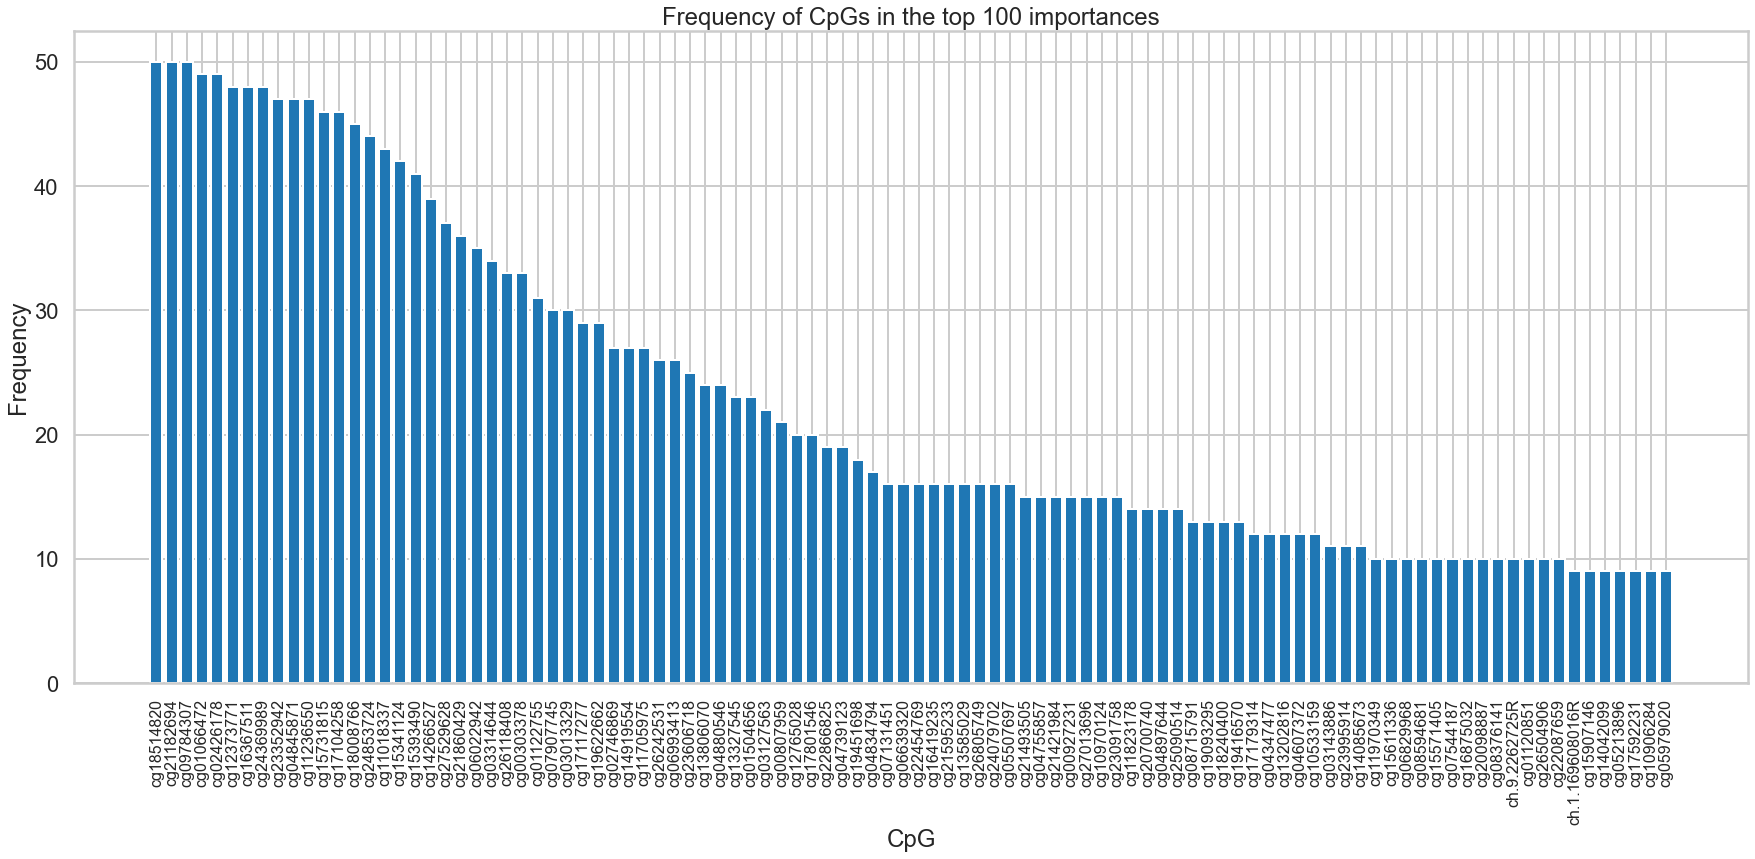

In [47]:
inds, vs, h = rg.histogram_of_top_CpGs_by_importance(df_imp, 100)

In [48]:
cpgs_XGboost_brain_ranked = h.index.values

#### Saving Rankings

In [49]:
# pu.pickle_object(cpgs_XGboost_brain_ranked, path_to_save_cpgs +'cpgs_XGboost_brain_ranked')

pickled as ../saved_features/cpgs_XGboost_brain_ranked


In [24]:
# cpgs_XGboost_brain_ranked = pu.get_pickled_object(path_to_save_cpgs + 'cpgs_XGboost_brain_ranked')

#### Save dataframes with columns from just ranked cpgs

In [50]:
# df_p_working_brain_ranked = df_p_working[cpgs_XGboost_brain_ranked]
# df_p_working_brain_ranked.insert(0, 'age', df_p_working.age)
# df_p_working_brain_ranked.insert(0, 'tissue', df_p_working.tissue)

# df_p_saved_brain_ranked = df_p_saved[cpgs_XGboost_brain_ranked]
# df_p_saved_brain_ranked.insert(0, 'age', df_p_saved.age)
# df_p_saved_brain_ranked.insert(0, 'tissue', df_p_saved.tissue)

# df_p_saved_brain_ranked.to_csv('df_p_saved_brain_ranked.csv')
# df_p_working_brain_ranked.to_csv('df_p_working_brain_ranked.csv')